In [ ]:
!pip install numpy opencv-python matplotlib
!pip install ipywidgets

Enter 'upload' to upload an image or 'capture' to take a new photo: upload


Saving l2.jpg to l2.jpg


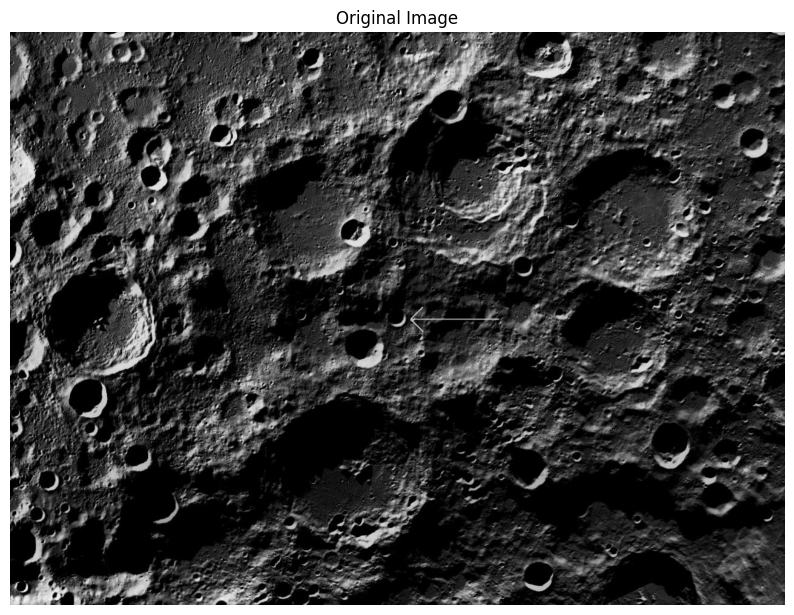

In [1]:
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            div.appendChild(video);
            video.style.display = 'block';

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const context = canvas.getContext('2d');

            const capturePromise = new Promise((resolve) => {
                capture.onclick = () => {
                    context.drawImage(video, 0, 0);
                    stream.getTracks().forEach(track => track.stop());
                    const dataUrl = canvas.toDataURL('image/jpeg', quality);
                    resolve(dataUrl);
                };
            });

            const dataUrl = await capturePromise;
            div.remove();
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


def choose_image_option():
    choice = input("Enter 'upload' to upload an image or 'capture' to take a new photo: ").strip().lower()
    if choice == 'upload':
        uploaded = files.upload()
        return list(uploaded.keys())[0]
    elif choice == 'capture':
        return take_photo()
    else:
        print("Invalid choice. Please enter 'upload' or 'capture'.")
        return choose_image_option()


image_path = choose_image_option()


img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


Button(description='Enhance Image', style=ButtonStyle())

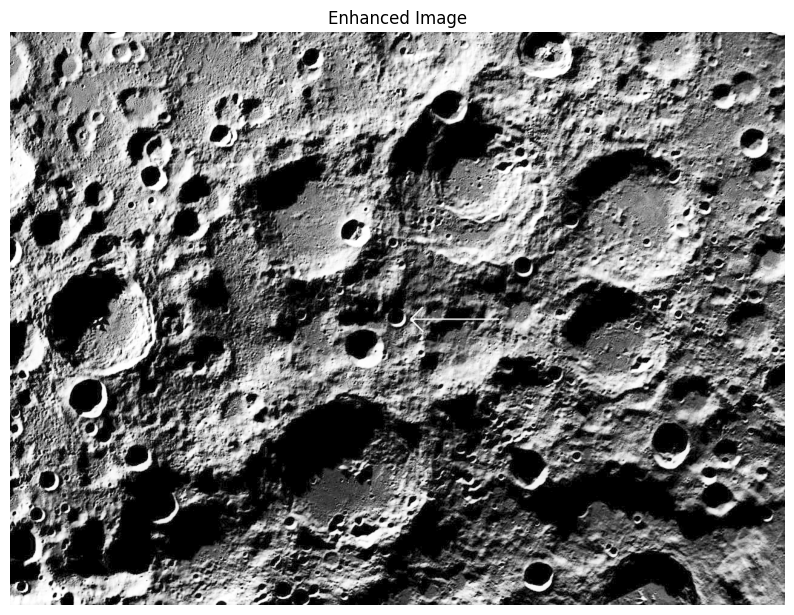

In [2]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import cv2


def enhance_image(image):
    enhanced_img = cv2.equalizeHist(image)
    return enhanced_img


enhance_button = widgets.Button(description="Enhance Image")

def on_enhance_button_click(b):
    global img
    enhanced_img = enhance_image(img)


    plt.figure(figsize=(10, 10))
    plt.imshow(enhanced_img, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    plt.show()


enhance_button.on_click(on_enhance_button_click)


display(enhance_button)
